In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from fastai.vision import *
from fastai.metrics import accuracy
from fastai.basic_data import *
from skimage.util import montage
import pandas as pd
from torch import optim
import re
import json
import cv2
import albumentations
from fastai.callbacks.hooks import num_features_model
from torch.nn import L1Loss

from utils import *

I used [sloth](https://github.com/cvhciKIT/sloth) to annotate the images.

You can find the config file in the `data` folder (`sloth_config.py`). The command to start `sloth` that I used was: `sloth --config sloth_config.py annotations.json`. I ran the command from within the directory where I stored my train images (both the `sloth_config.py` and `annotations.json` files were inside the directory as well).

In [3]:
SZ = 500

In [10]:
# https://github.com/albu/albumentations/blob/master/notebooks/example_bboxes.ipynb
def visualize(sample):
    
    return plot_im(sample['image'], sample['bboxes'])

def plot_im(img,bbox):
    x_min, y_min, x_max, y_max = map(int, bbox[0])
    
    img = cv2.rectangle(img, (x_min, y_min), (x_max,y_max),(255, 0, 0),2)
    return img
    

def get_aug(aug, min_area=0., min_visibility=0.):    
    return albumentations.Compose(aug, bbox_params={'format': 'pascal_voc', 'min_area': min_area, 'min_visibility': min_visibility, 'label_fields': ['category_id']})
aug = get_aug([albumentations.RandomBrightnessContrast(always_apply=True), 
               albumentations.ShiftScaleRotate(rotate_limit=10, always_apply=True),
              albumentations.augmentations.transforms.HorizontalFlip()
              ])

(1150, 4)


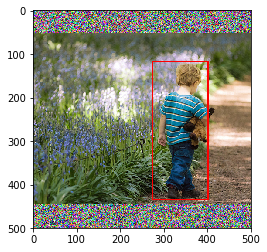

In [5]:
from motion.detect_human import BBoxDataset
bbdata = BBoxDataset("coco/val2017_one_human.csv", size = SZ, type = "val")
sample = bbdata[0]
plt.imshow(visualize(sample))

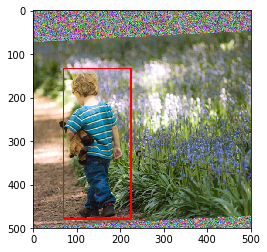

In [11]:
sample = bbdata[0]
sample = aug(**sample,cat2name = {0: 'person'} )
plt.imshow(visualize(sample))

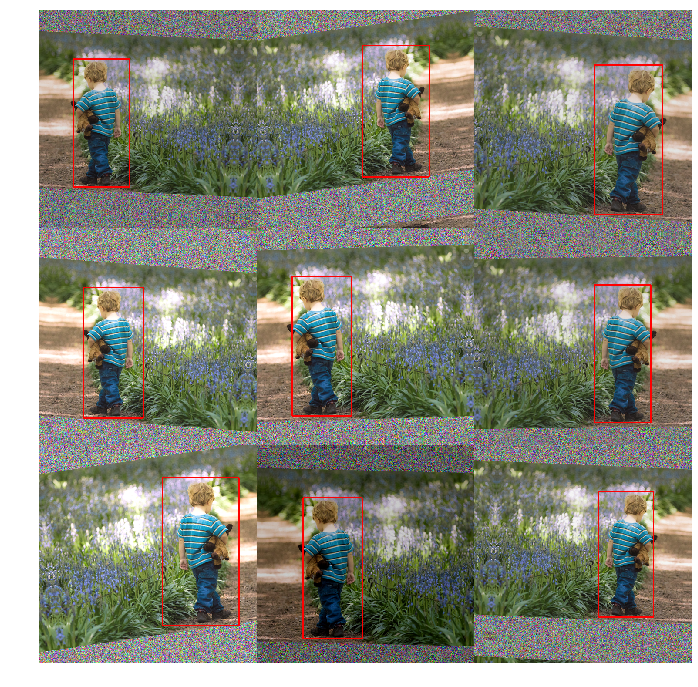

In [12]:
ims = np.stack([visualize( aug(**bbdata[0],cat2name = {0: 'person'})) for i in range(9)])
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(montage(np.stack(ims), multichannel=True))

with augmentation

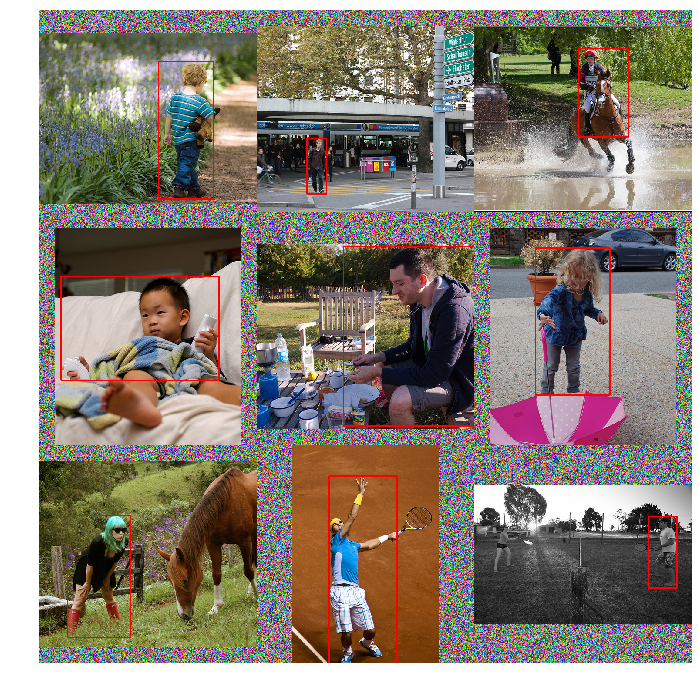

In [8]:
aug = get_aug([albumentations.RandomBrightnessContrast(always_apply=True), albumentations.ShiftScaleRotate(rotate_limit=10, always_apply=True)])
a = []
ims = np.stack([visualize(bbdata[i]) for i in range(9)])
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(montage(np.stack(ims), multichannel=True))

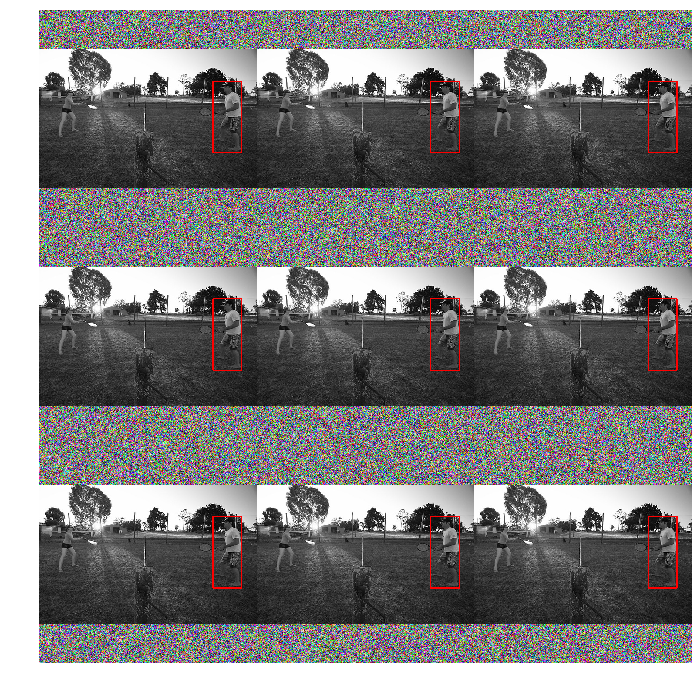

In [9]:
aug = get_aug([albumentations.RandomBrightnessContrast(always_apply=True), albumentations.ShiftScaleRotate(rotate_limit=10, always_apply=True)])

ims = np.stack([visualize(bbdata[8]) for i in range(9)])
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(montage(np.stack(ims), multichannel=True))

In [14]:
from motion.detect_human import BBoxDataset
trn_ds = BBoxDataset("coco/val2017_one_human.csv", type="valid", [albumentations.RandomBrightnessContrast(always_apply=True), albumentations.ShiftScaleRotate(rotate_limit=10, always_apply=True)])
val_ds = CustomDataset(val_j)